<a href="https://colab.research.google.com/github/malikumarali/malikumarali/blob/main/EmployeAttribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load (filename within the Kaggle dataset)
file_path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"  # Assuming this is the correct filename on Kaggle

# Load the latest version
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "pavansubhasht/ibm-hr-analytics-attrition-dataset",
    file_path,
    # Provide any additional arguments like
    # sql_query or pandas_kwargs. See the
    # documenation for more information:
    # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())


<ipython-input-9-647e94544cc0>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:    Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOpti

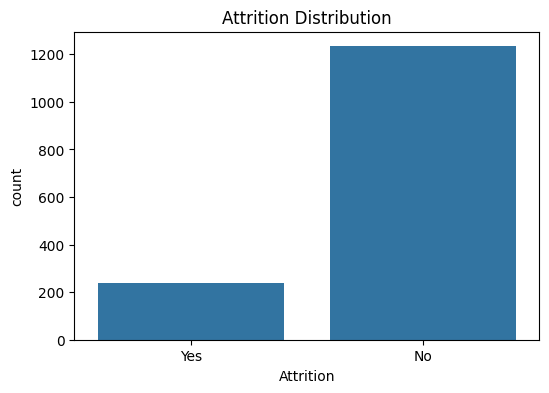

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

print(df['Attrition'].value_counts(normalize=True))

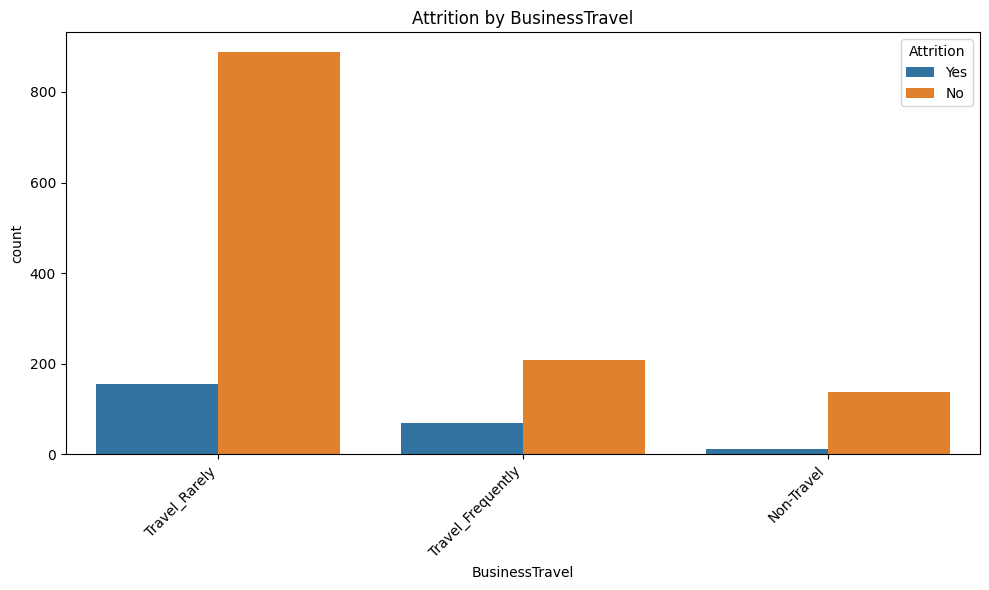

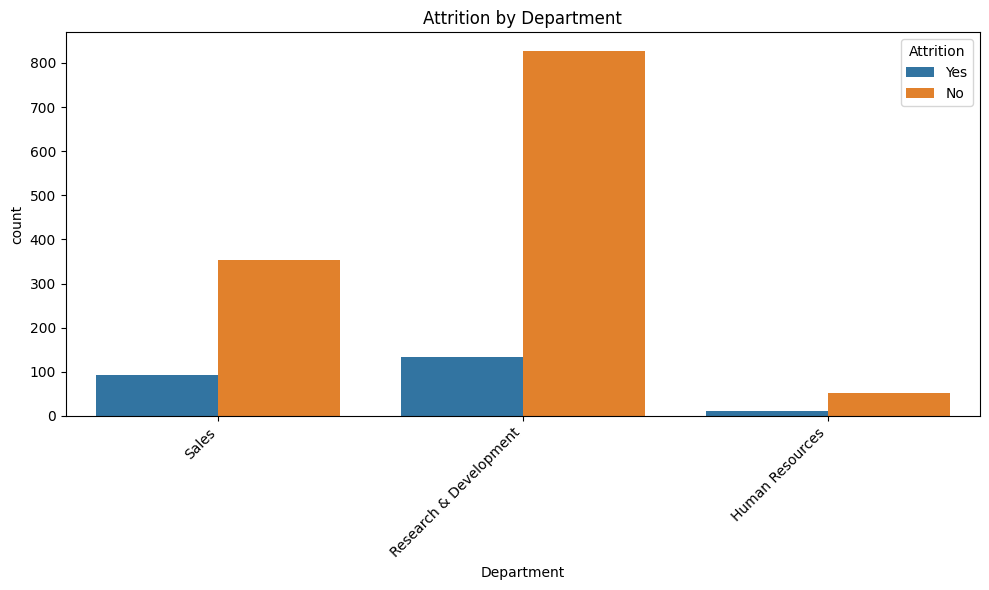

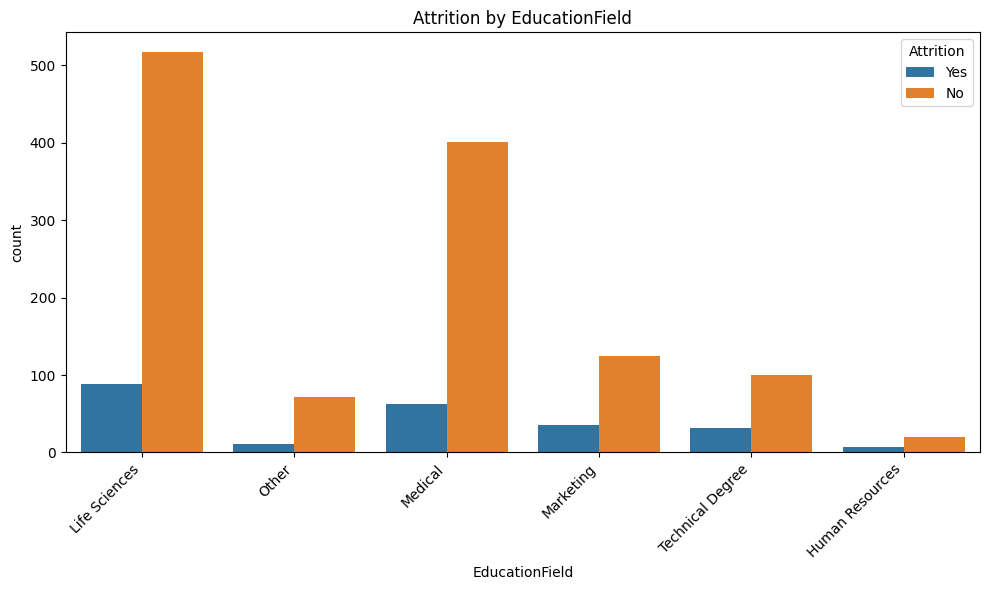

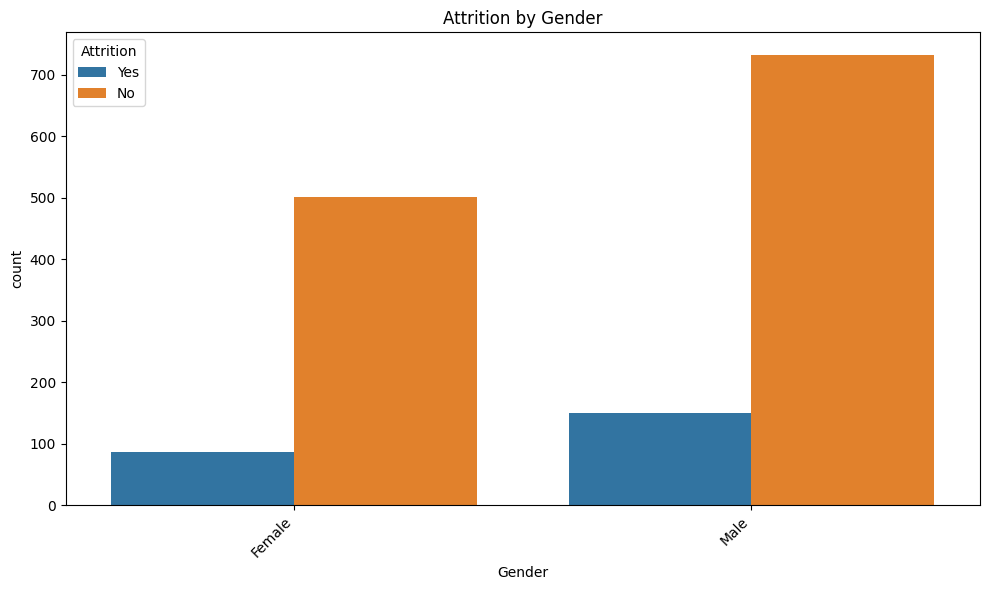

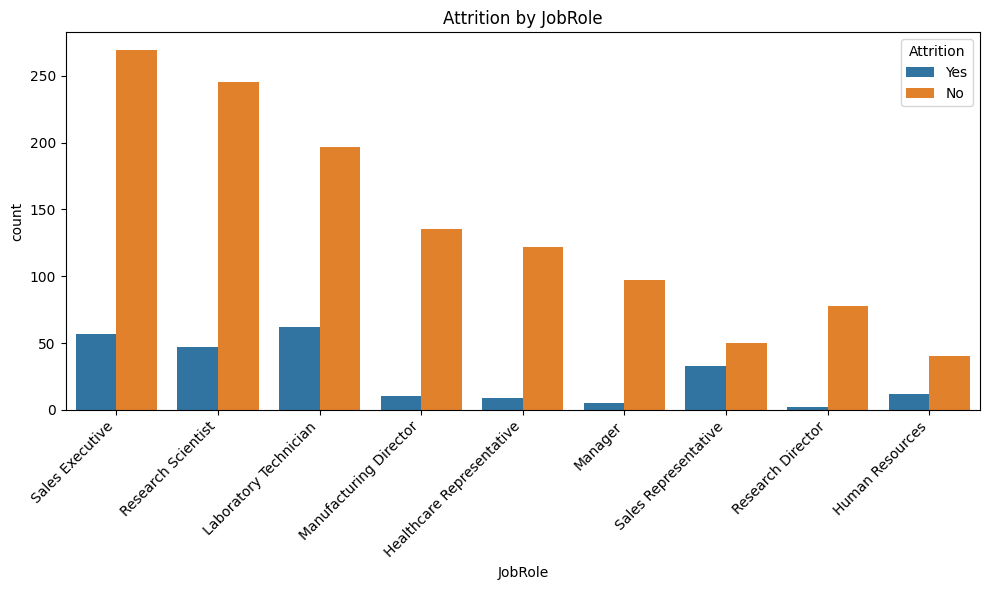

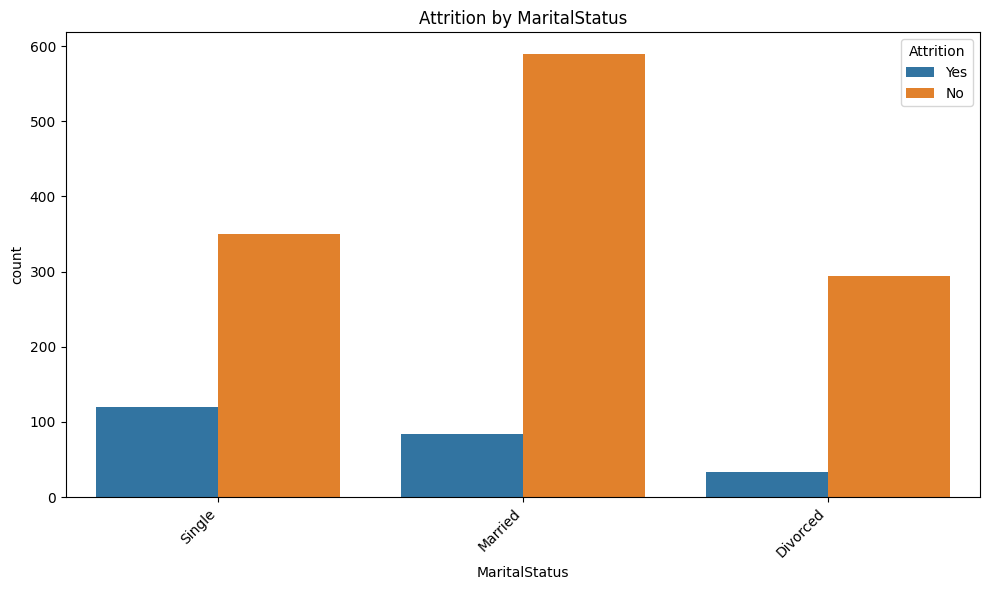

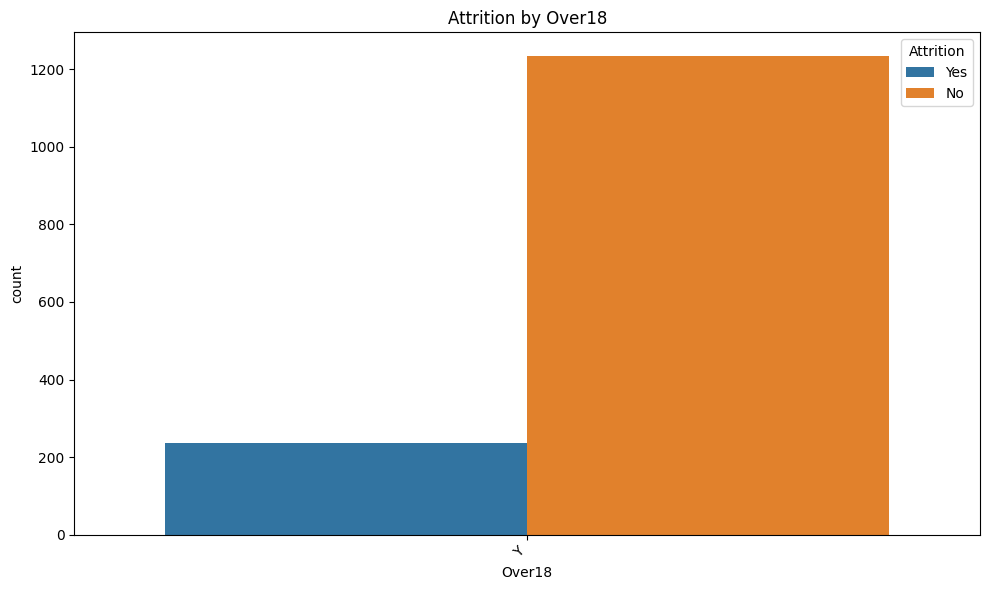

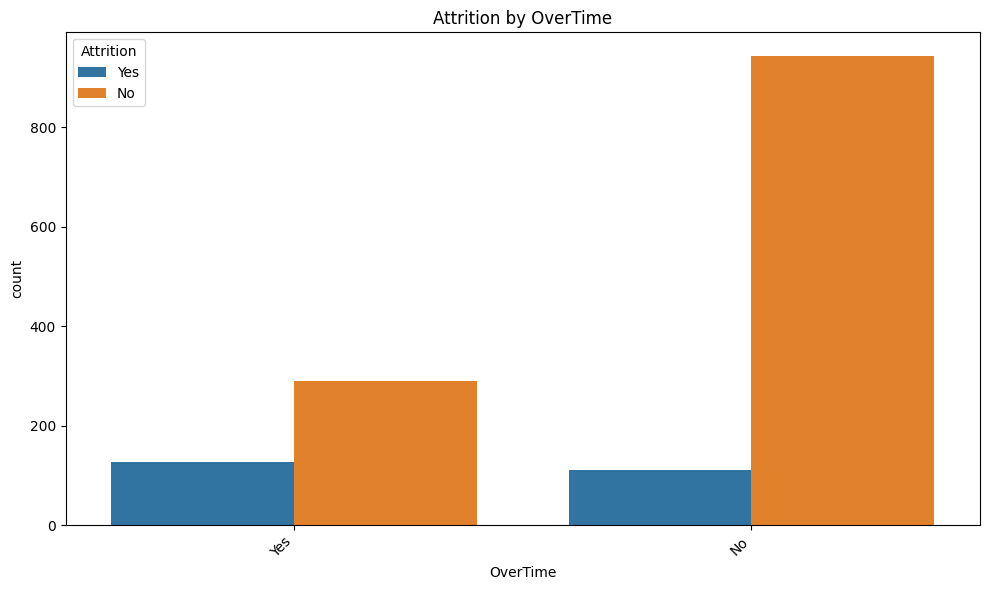

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Attrition') # Don't plot the target against itself

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title(f'Attrition by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

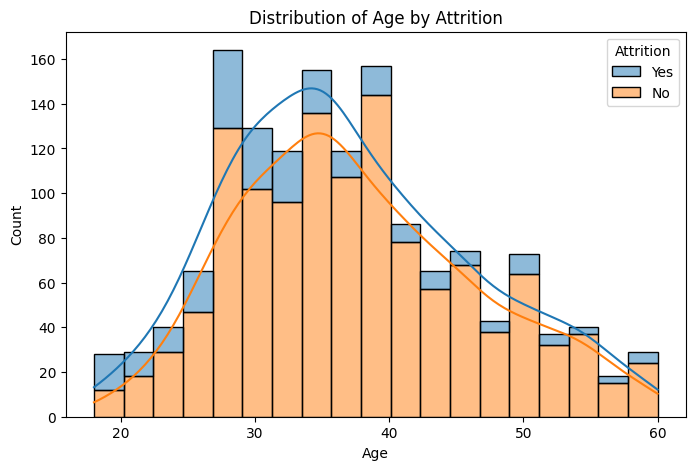

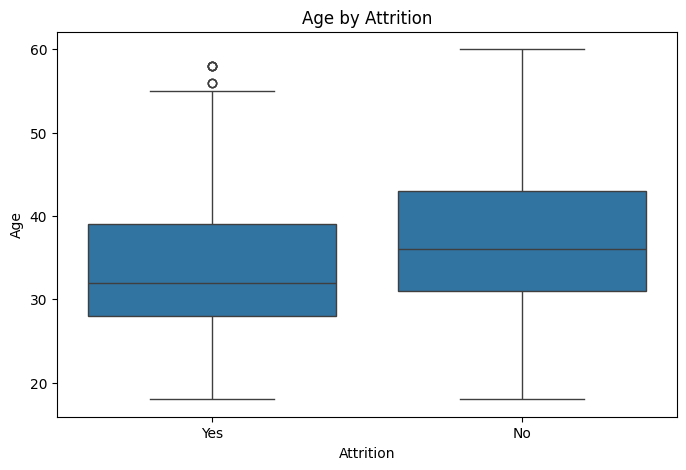

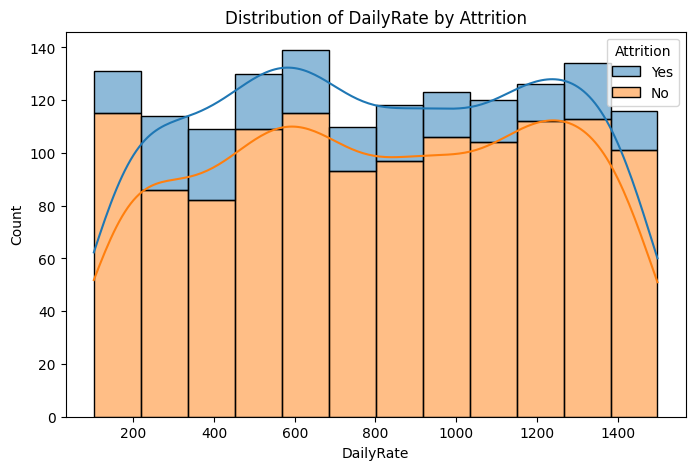

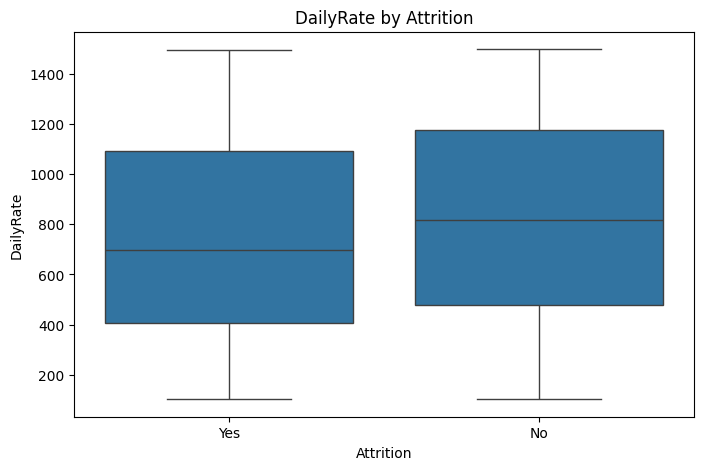

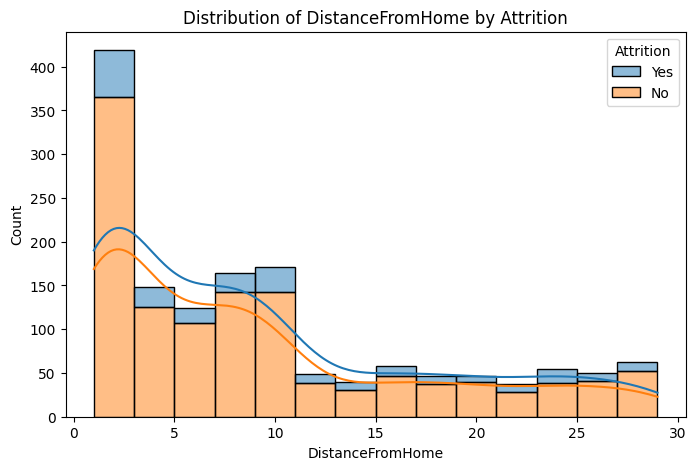

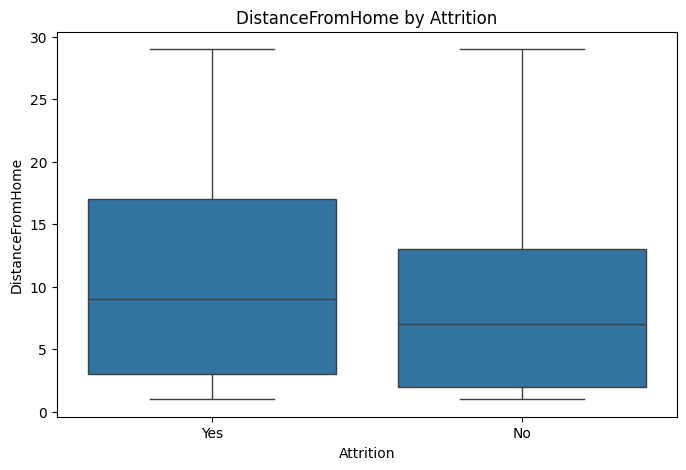

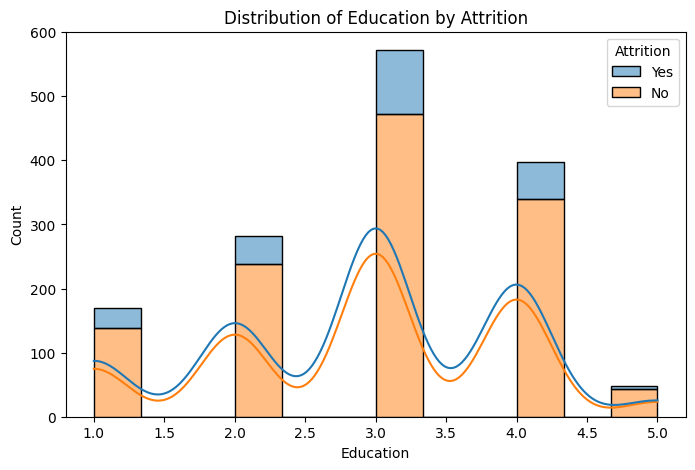

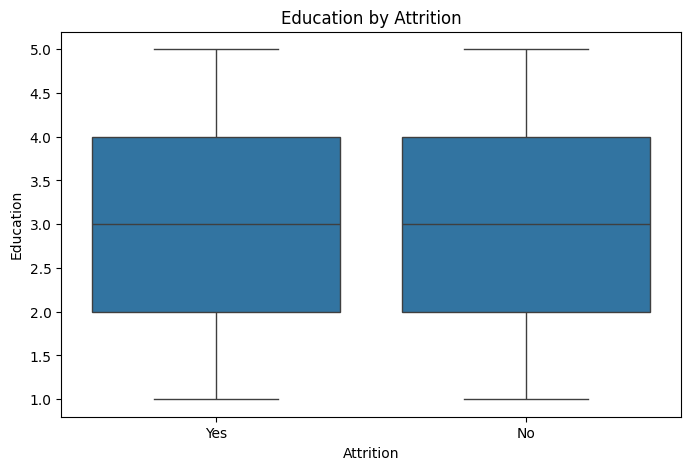

Could not plot KDE for EmployeeCount: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.


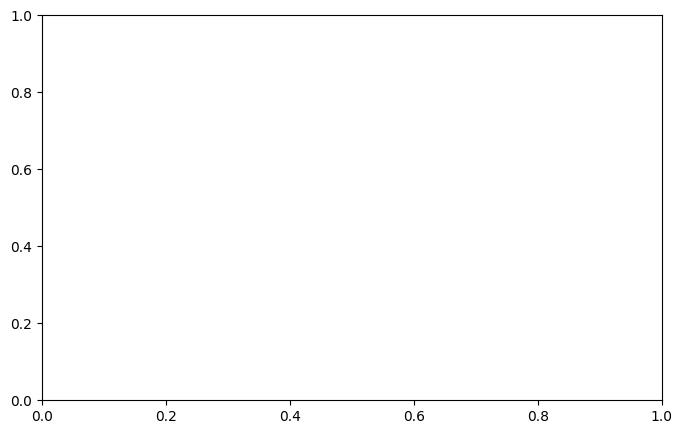

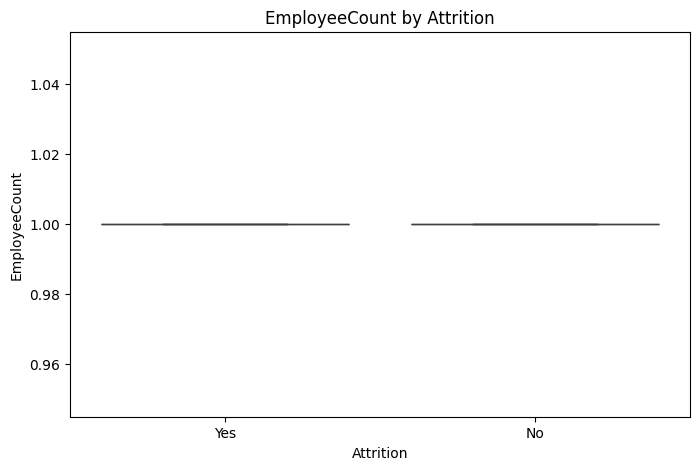

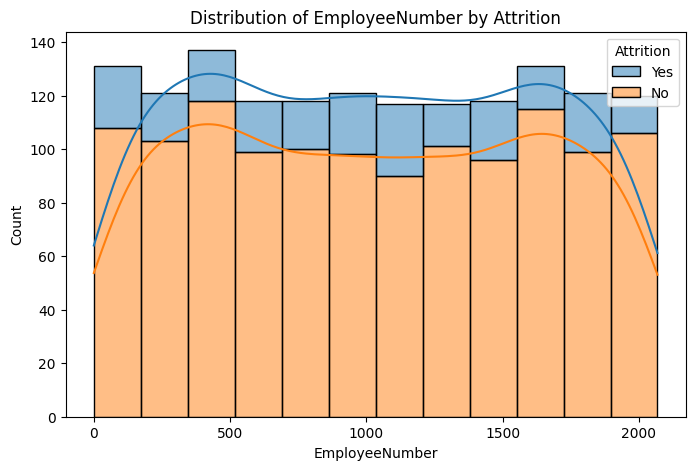

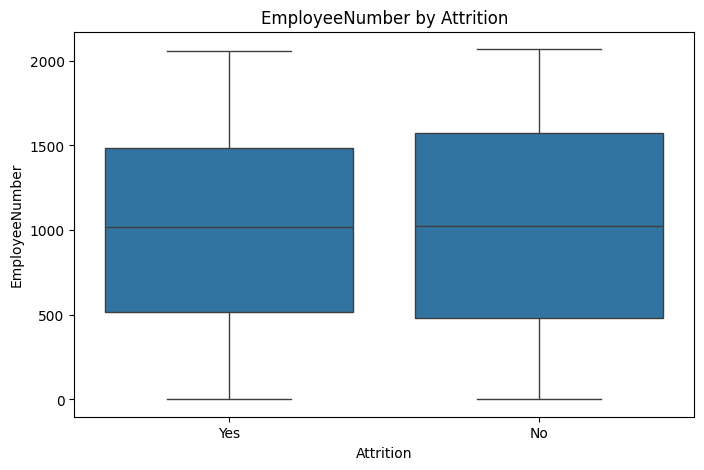

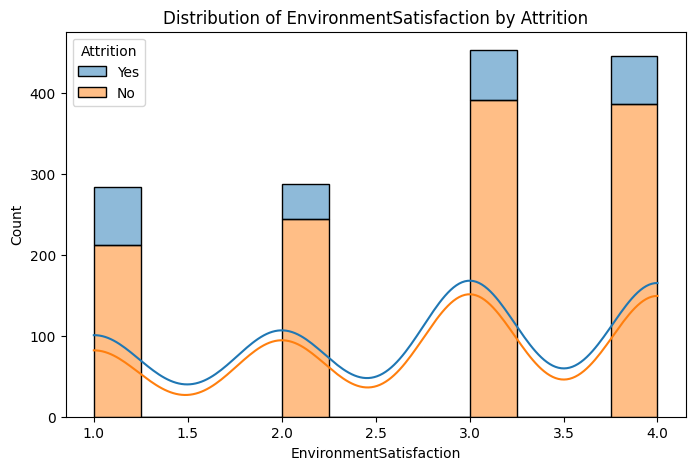

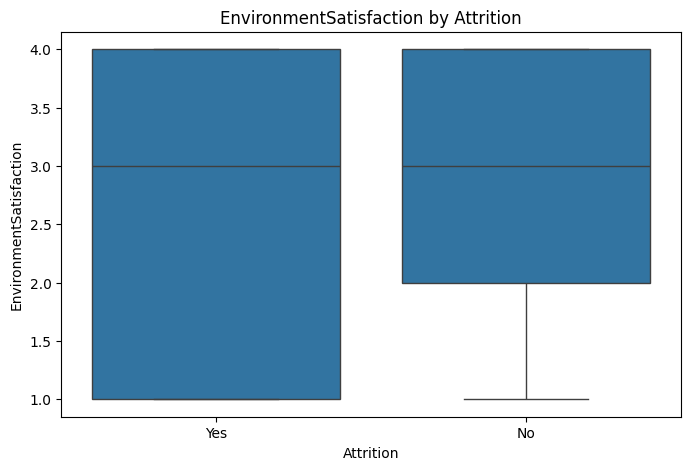

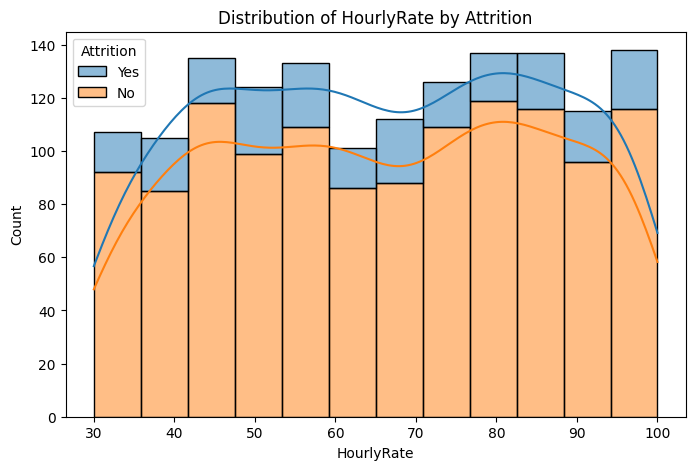

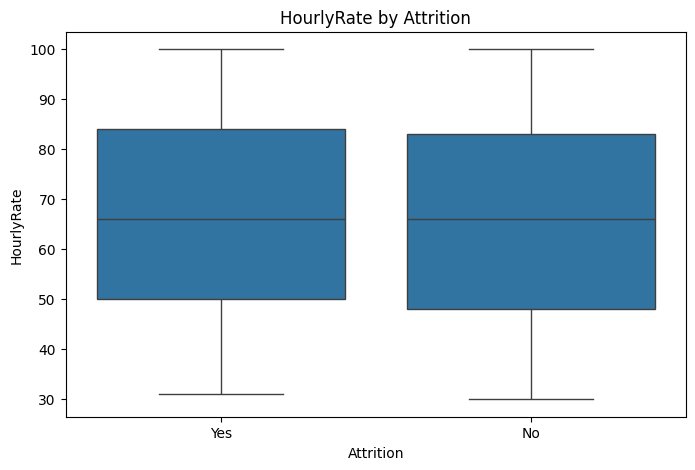

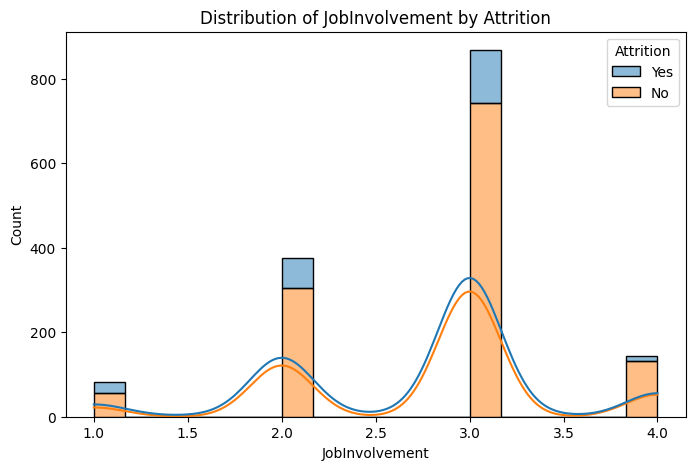

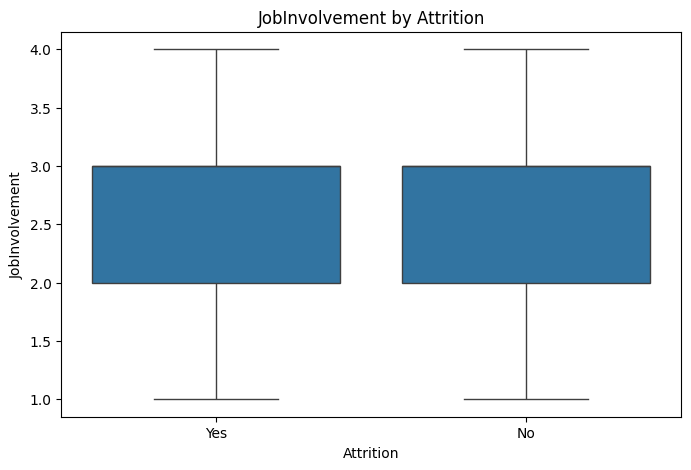

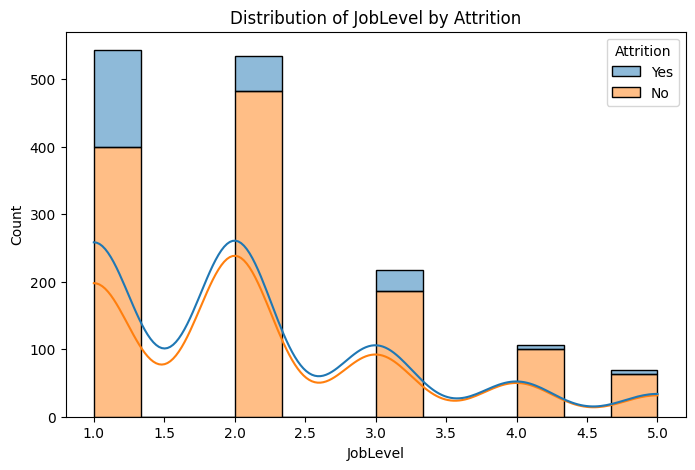

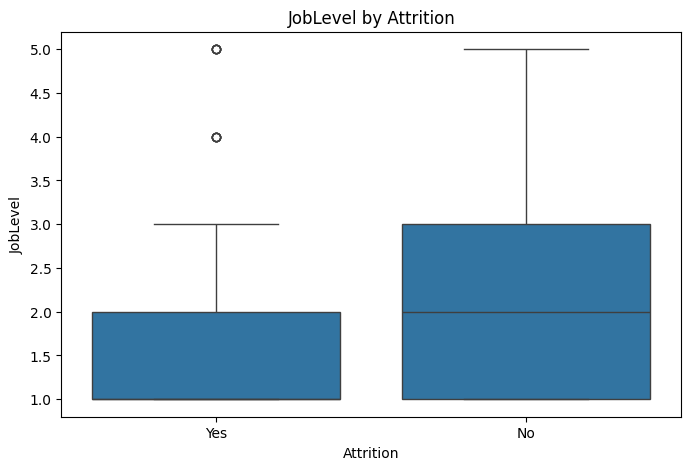

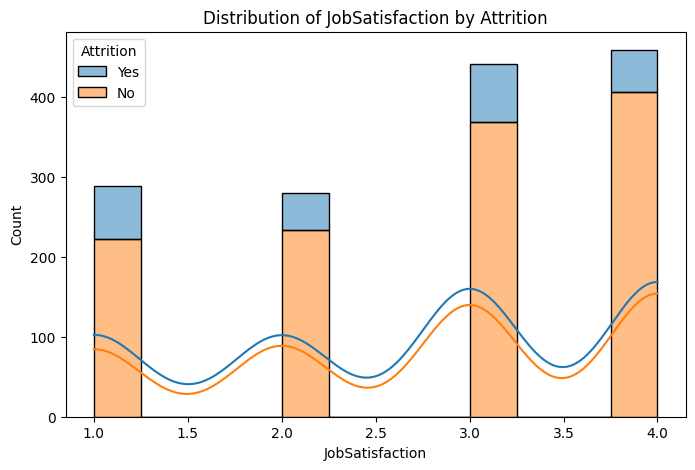

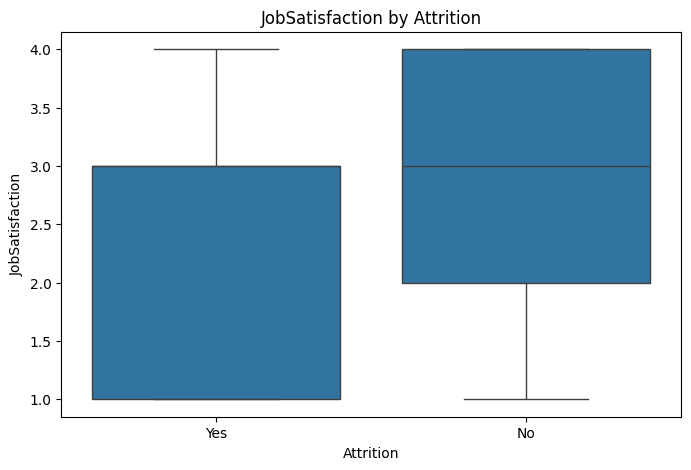

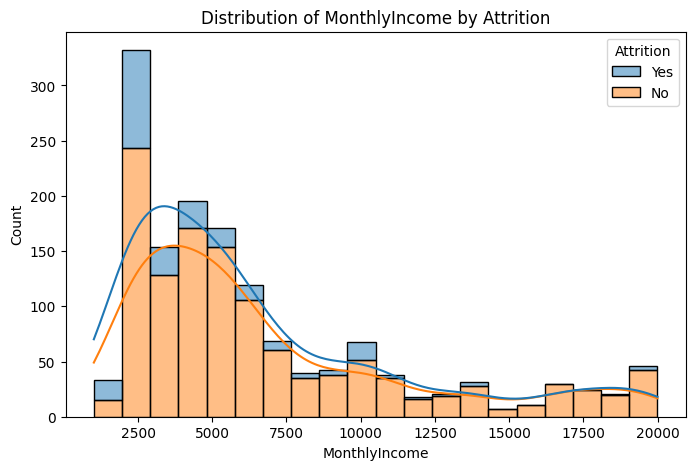

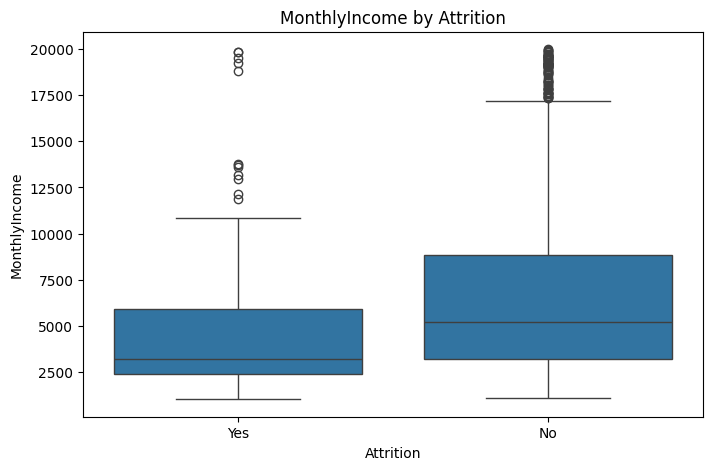

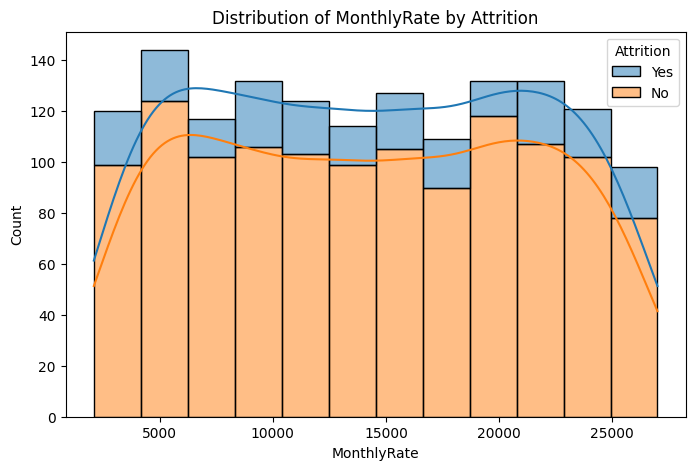

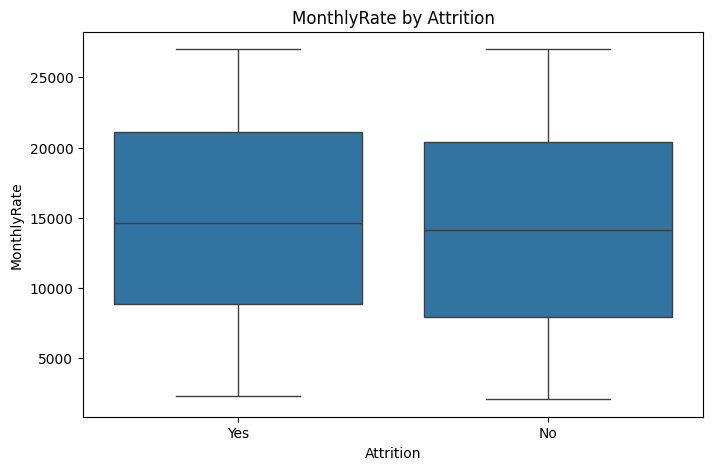

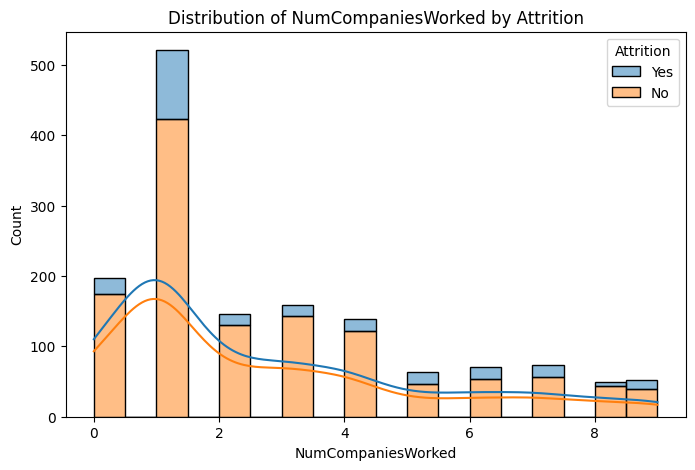

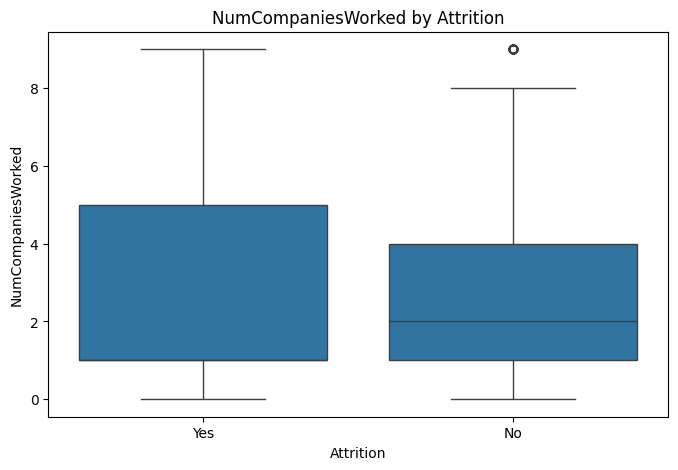

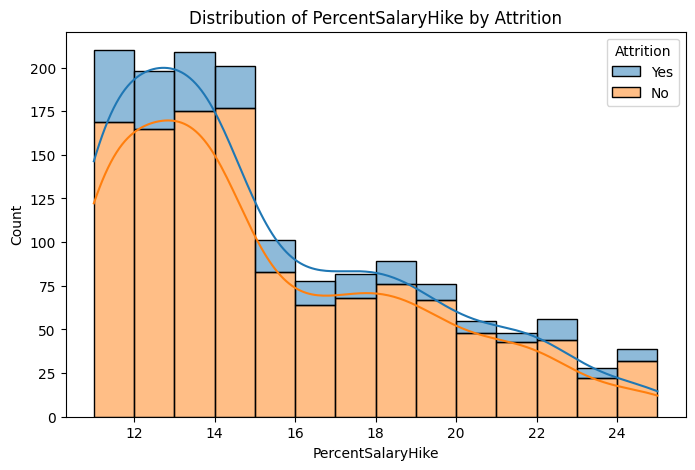

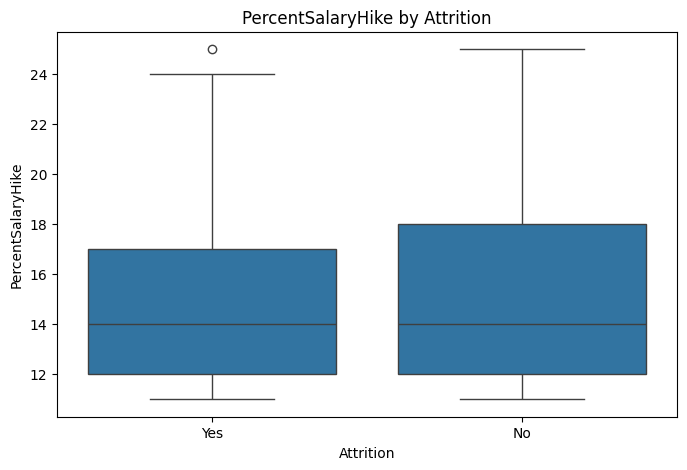

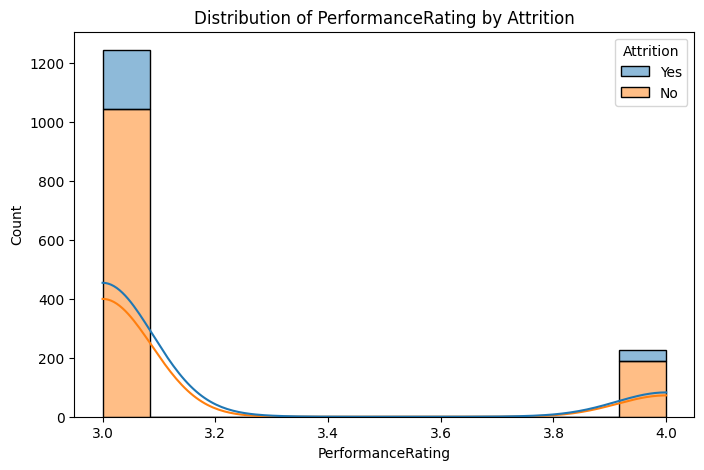

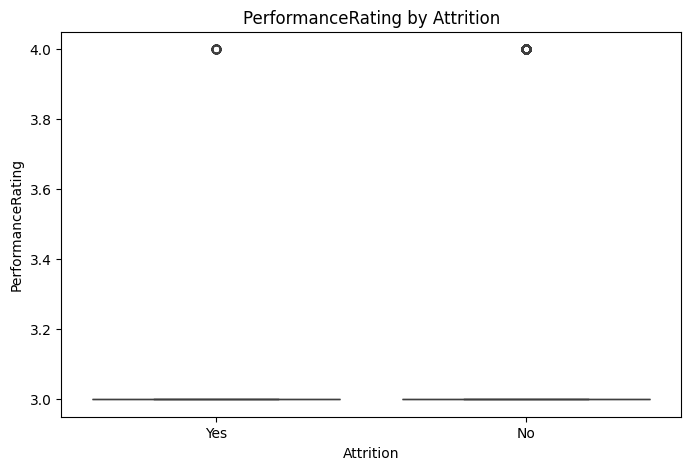

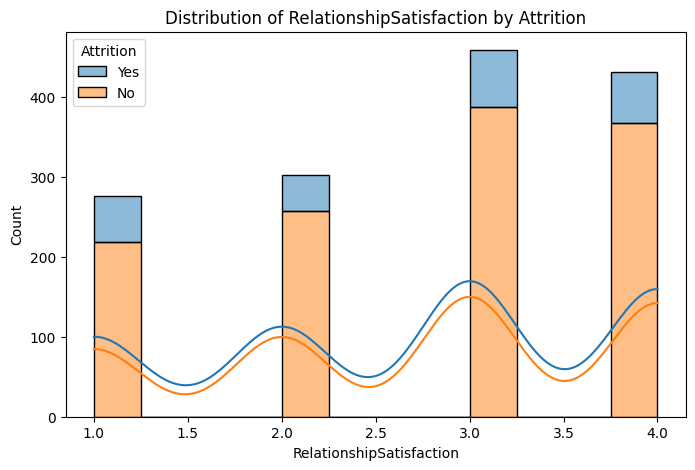

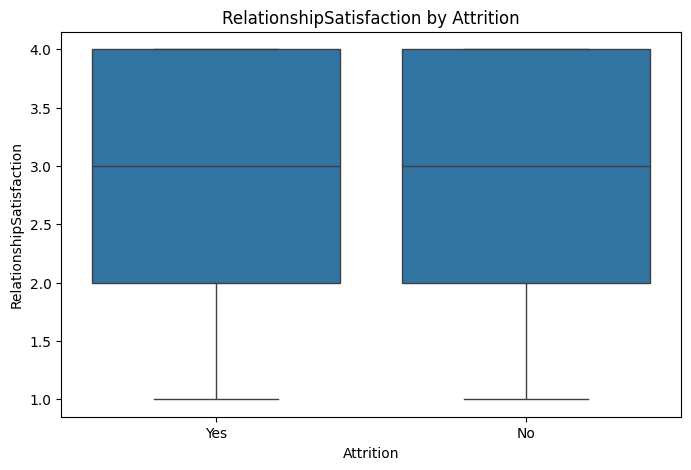

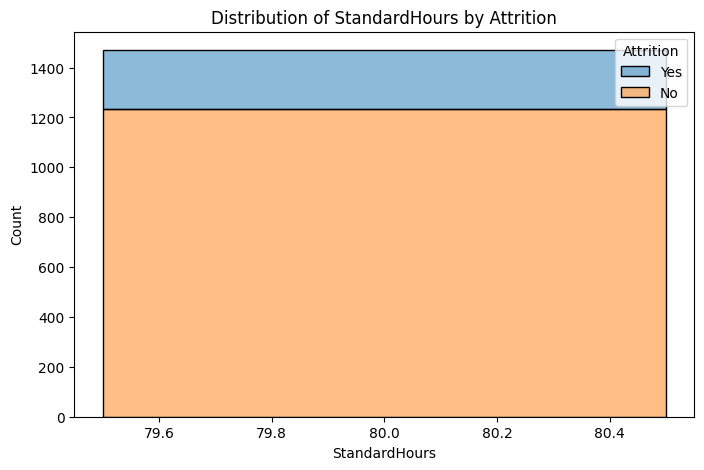

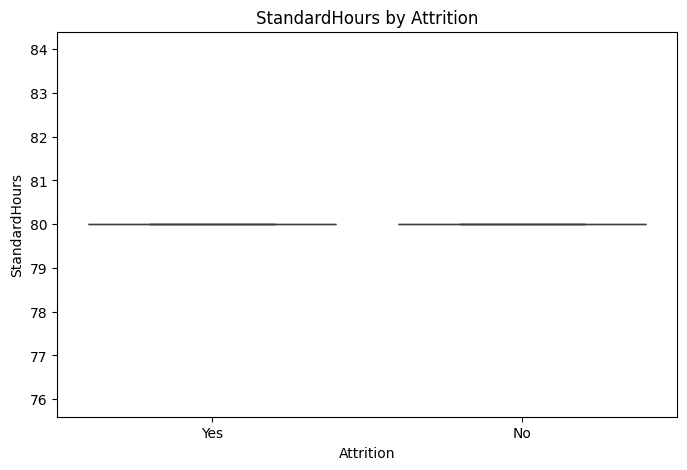

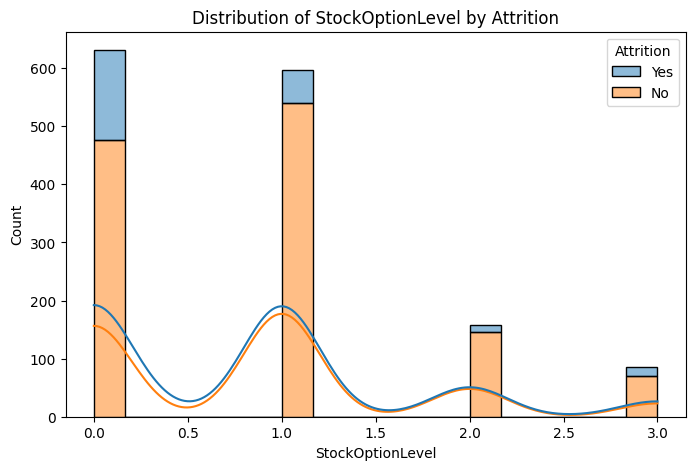

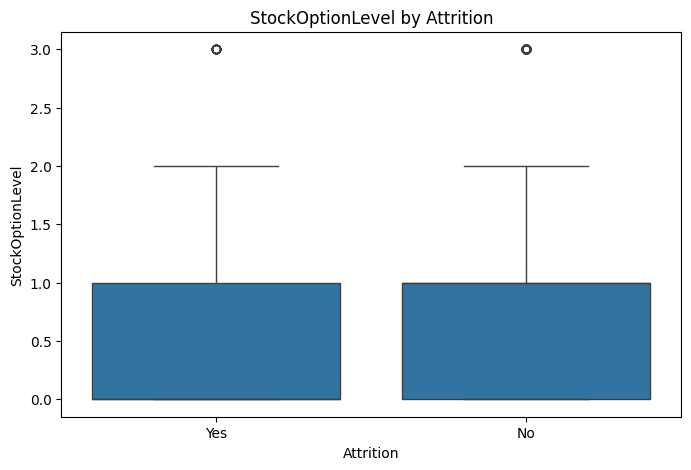

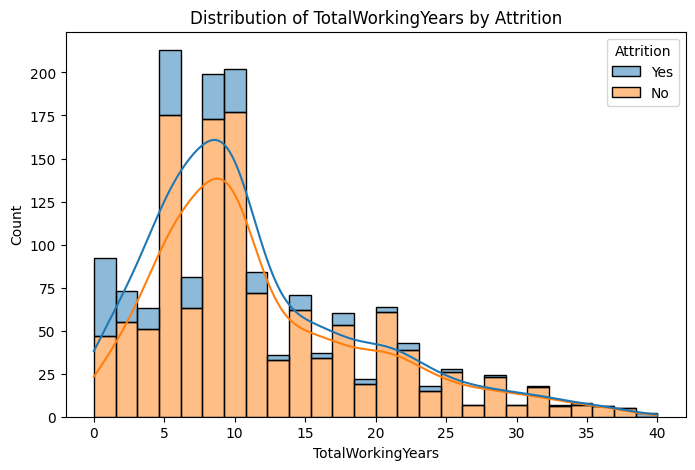

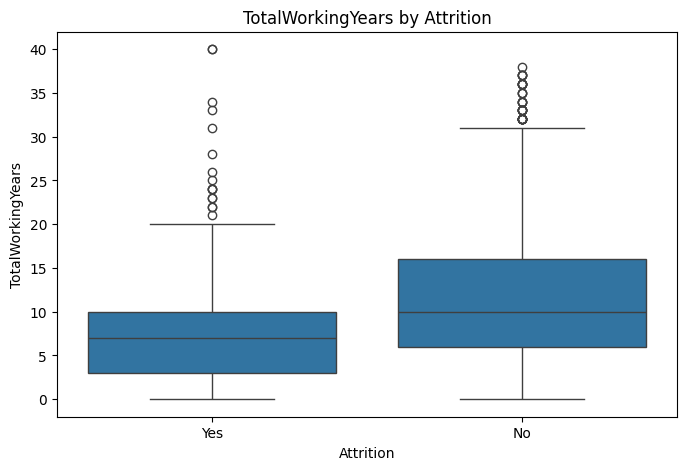

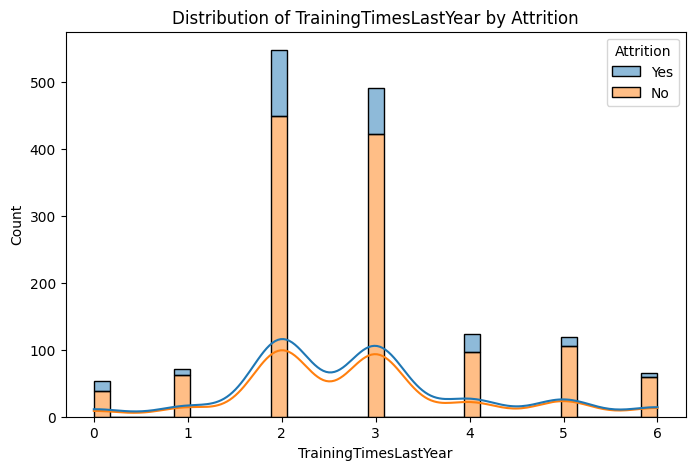

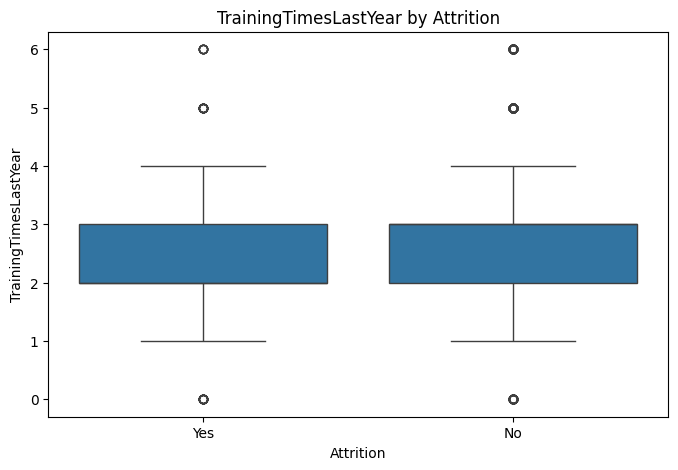

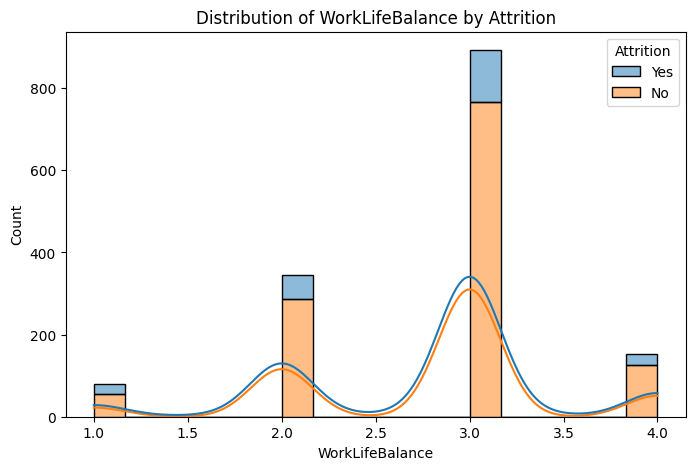

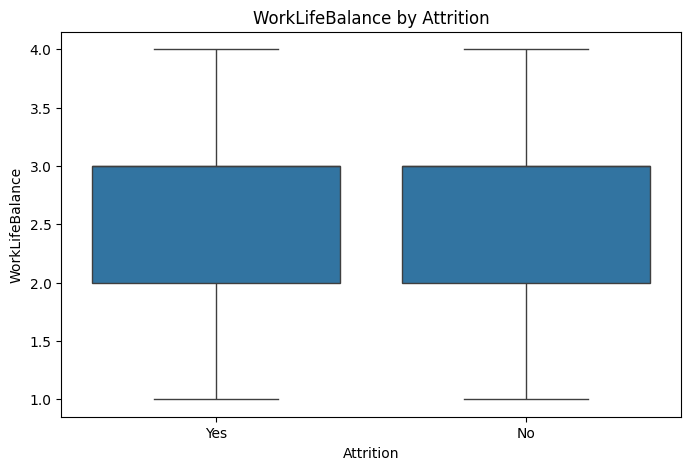

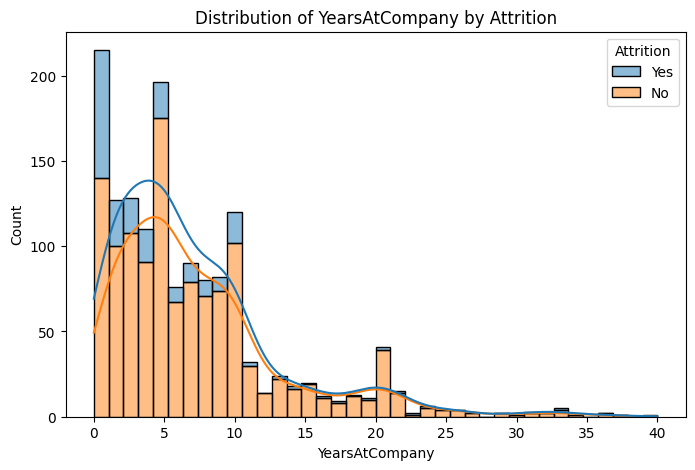

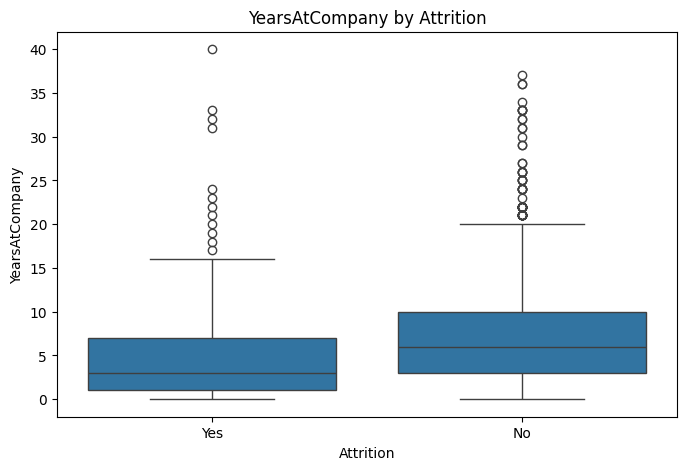

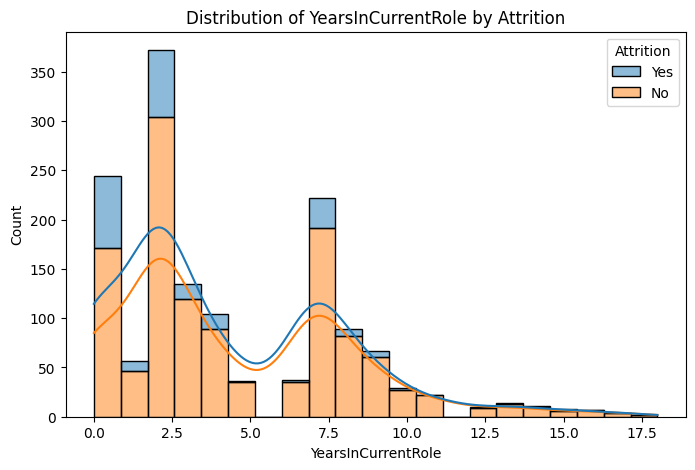

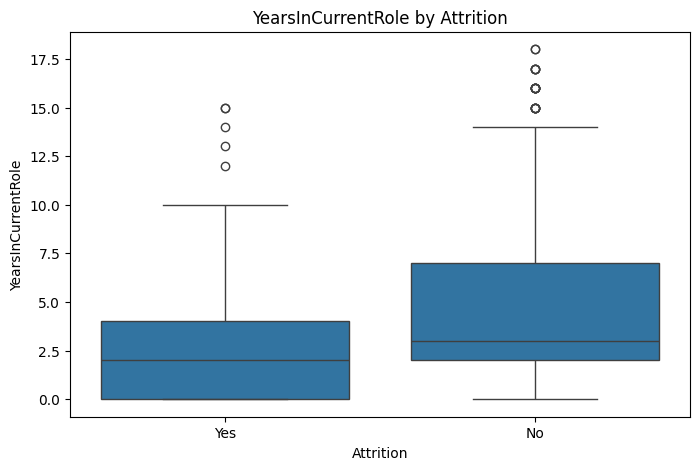

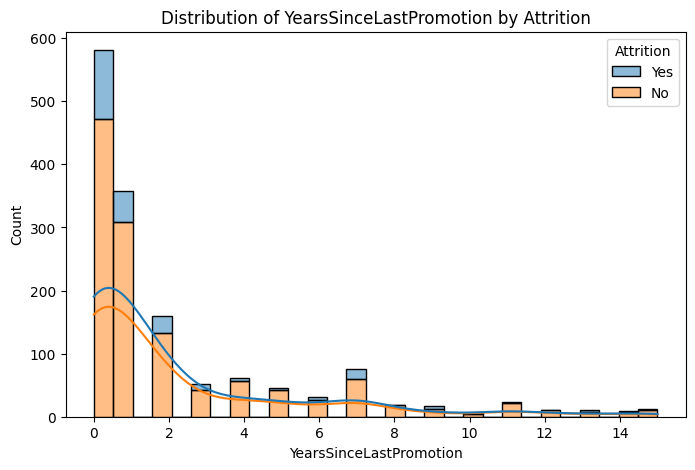

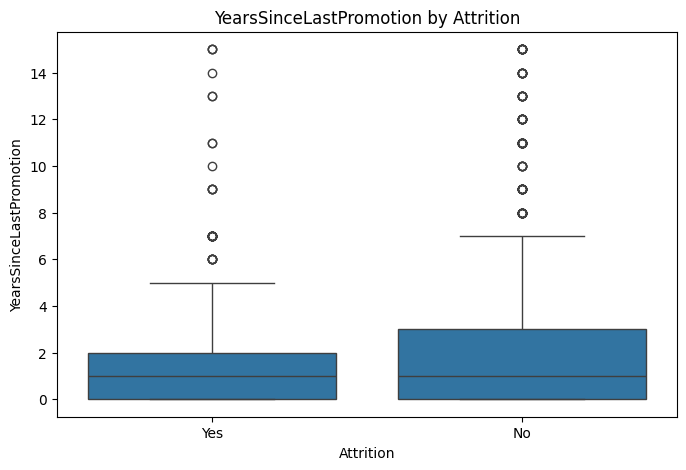

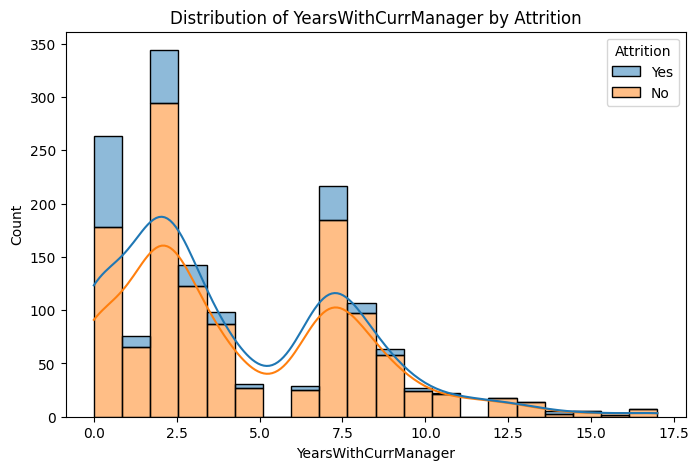

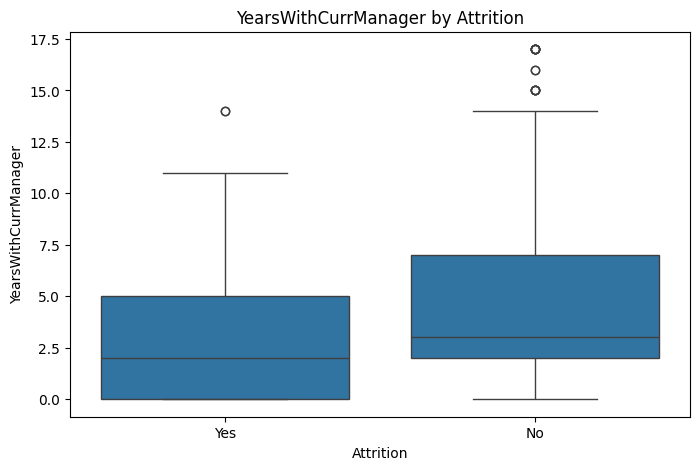

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    try:
        sns.histplot(data=df, x=col, hue='Attrition', kde=True, multiple="stack")
        plt.title(f'Distribution of {col} by Attrition')
        plt.show()
    except Exception as e:
        print(f"Could not plot KDE for {col}: {e}")

    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(f'{col} by Attrition')
    plt.show()


Original number of features: 26
Number of principal components: 19


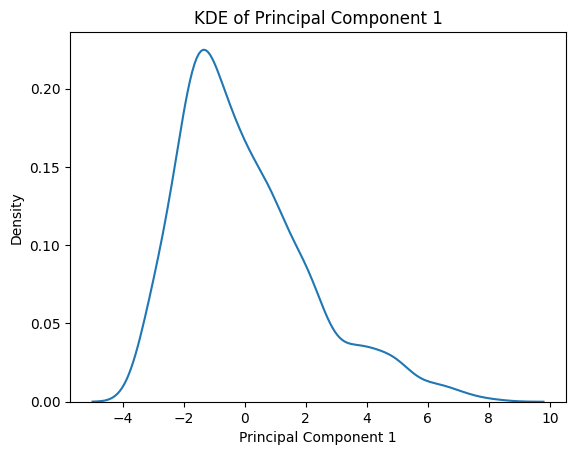

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'df' is your DataFrame with numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Scale the numerical features before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])

# Apply PCA
pca = PCA(n_components=0.95) # Retain 95% of the variance
principal_components = pca.fit_transform(scaled_data)

print("Original number of features:", scaled_data.shape[1])
print("Number of principal components:", principal_components.shape[1])

# You can now try to perform KDE on the principal components
# For example, if you want to visualize the distribution along the first PC:
import seaborn as sns
sns.kdeplot(principal_components[:, 0])
plt.xlabel("Principal Component 1")
plt.ylabel("Density")
plt.title("KDE of Principal Component 1")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the dataset (make sure you have this part)
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "pavansubhasht/ibm-hr-analytics-attrition-dataset",
    "WA_Fn-UseC_-HR-Employee-Attrition.csv"
)

# Encode the target variable
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition']) # Yes -> 1, No -> 0

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Attrition')

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Prepare features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Now, the X_train, y_train, X_test, and y_test variables are defined.

<ipython-input-20-b22779115b76>:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))

# Logistic Regression
lr_model = LogisticRegression(random_state=42, solver='liblinear') # Choose a suitable solver
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))

Random Forest Results:
Accuracy: 0.8390022675736961
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       370
           1       0.50      0.10      0.16        71

    accuracy                           0.84       441
   macro avg       0.68      0.54      0.54       441
weighted avg       0.79      0.84      0.79       441

Confusion Matrix:
 [[363   7]
 [ 64   7]]

Logistic Regression Results:
Accuracy: 0.8820861678004536
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       370
           1       0.74      0.41      0.53        71

    accuracy                           0.88       441
   macro avg       0.82      0.69      0.73       441
weighted avg       0.87      0.88      0.87       441

Confusion Matrix:
 [[360  10]
 [ 42  29]]


<ipython-input-28-38b90532a0bb>:10: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


Prediction for instance 5: 0


<Figure size 640x480 with 0 Axes>

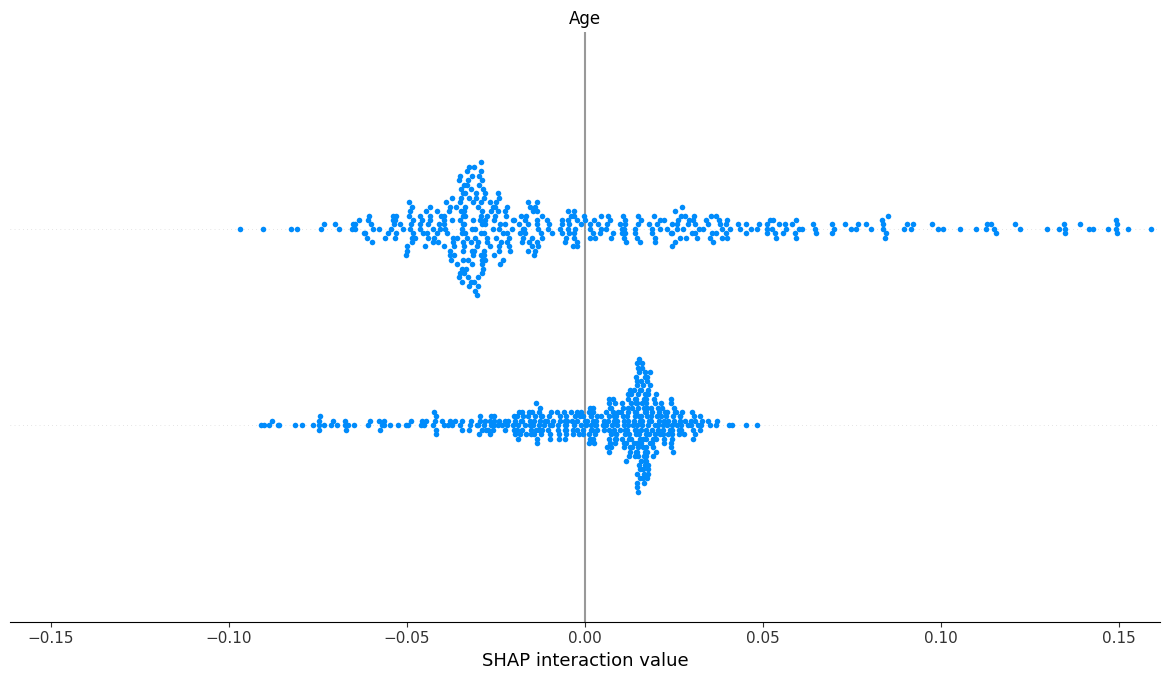

In [ ]:
import shap
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from kagglehub import KaggleDatasetAdapter
import kagglehub

# Load your data and train your model (as you've done before)
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "pavansubhasht/ibm-hr-analytics-attrition-dataset",
    "WA_Fn-UseC_-HR-Employee-Attrition.csv"
)

le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Attrition')

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Explain the model
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

# Initialize JavaScript for visualizations
shap.initjs()

# Generate your SHAP visualizations (e.g., force plot)
i = 5  # Choose an instance from the test set
print(f"Prediction for instance {i}: {rf_model.predict(X_test.iloc[[i]])[0]}")
shap.force_plot(explainer_rf.expected_value[1], shap_values_rf[i][:, 1], X_test.iloc[i,:], link="logit")

# You can also generate other SHAP plots after running initjs()
shap.summary_plot(shap_values_rf, X_test.columns)

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=0b2020e36f84e1faff05ecc02f60883857a475e93672176ebd269c23492b9dcb
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular

# Explain Random Forest model using LIME
explainer_lime_rf = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['No Attrition', 'Attrition'],
    mode='classification'
)

i = 10 # Choose another instance from the test set
explanation_rf = explainer_lime_rf.explain_instance(
    data_row=X_test.iloc[i].values,
    predict_fn=rf_model.predict_proba
)
explanation_rf.show_in_notebook(show_table=True, show_all=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
